In [58]:

from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,ef77addd-48e3-4be6-b77e-5a51c63a2d3a,sparse_recovery,Transformer,N=50_Phi=normal_d=20_sparsity=3_tau=1,-1,-1,20,12,8,compressed_sensing


In [60]:
task = "sparse_recovery"
#task = "matrix_factorization"

run_id = "ef77addd-48e3-4be6-b77e-5a51c63a2d3a"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training


compressed_sensing ef77addd-48e3-4be6-b77e-5a51c63a2d3a


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 19239.93it/s]


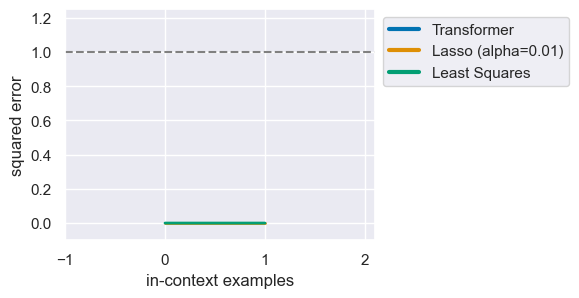

In [61]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()
